# 일진수 자연수와 리스트에 대해 좀더

## 인자가 두 개인 함수에서의 수학적귀납법스러운 정의
지난번 HelloHaskell 노트북에서는 일진수 자연수 데이타 타입 `Nat`을 정의하고 일진수 자연수를 컴퓨터에서 제공되는 정수로 변환하는 함수 `nat2int`를 정의해 보았으며 그와 거의 같은 구조를 갖는 `List`의 길이를 구하는 함수 `len`을 정의해 보았다.
하나가 아닌 두 개의 `Nat`이나 `List`를 인자로 받는 함수들,
즉 `Nat`이나 `List`에 대한 이항 함수들 중에도 이와 같이 거의 유사한 구조를 갖는 것들이 있다.
두 개의 인자 둥에 하나를 기준으로 수학적귀납법스럽게 정의할 수 있는 함수들이 있는데,
대표적으로 일진수 자연수의 덧셈 함수와 리스트 이어붙이기 함수가 그러하다.

In [1]:
data Nat  = Z   | S Nat          deriving Show
data List = Nil | Cons Int List  deriving Show

In [2]:
-- 일진수 덧셈
plus :: Nat -> Nat -> Nat
plus Z     m = m            -- induction base
plus (S n) m = S (plus n m) -- inductive step

In [3]:
-- 리스트 두 개를 이어붙이는 함수
append :: List -> List -> List
append Nil         ys = ys -- induction base
append (Cons x xs) ys = Cons x (append xs ys) -- inductive step

In [4]:
two   = S (S Z)
three = S (S (S Z))

plus Z three    -- 결과가 3에 해당하는 일진수
plus two three  -- 결과가 5에 해당하는 일진수

S (S (S Z))

S (S (S (S (S Z))))

In [5]:
list1 = Cons 1 (Cons 2 Nil)
list2 = Cons 3 (Cons 4 (Cons 5 Nil))

append Nil list2    -- 결과가 3,4,5 가 들어있는 리스트
append list1 list2  -- 결과가 1,2,3,4,5 가 들어있는 리스트

Cons 3 (Cons 4 (Cons 5 Nil))

Cons 1 (Cons 2 (Cons 3 (Cons 4 (Cons 5 Nil))))

## 두 개의 인자에 대한 동시 귀납으로 정의되는 함수 
모든 이항 함수가 하나의 인자를 기준으로 하여 귀납적으로 잘 정의되는 것은 아니다.
두 개의 인자에 대해 동시에 귀납단계를 밟는 방식으로 정의하는 것이 자연스러운 함수들도 있다.

In [6]:
-- 두 일진수 중에 작은 값을 돌려주는 함수
minNat Z     m     = Z -- induction base
minNat n     Z     = Z -- induction base
minNat (S n) (S m) = S (minNat n m) -- inductive step

In [7]:
minNat two three
minNat three two

S (S Z)

S (S Z)

In [8]:
plusList Nil         ys          = Nil -- induction base
plusList xs          Nil         = Nil -- induction base
plusList (Cons x xs) (Cons y ys) = Cons (x+y) (plusList xs ys)-- inductive step

In [9]:
plusList list1 list2
plusList list2 list1

Cons 4 (Cons 6 Nil)

Cons 4 (Cons 6 Nil)

---

---

# 과제

---

과목/분반:

이름:

학번:

---
이 과제는 다른 라이브러리 모듈을 `import` 하지 않고 작성한다.

1. 일진수 곱셈을 계산하는 `mult`를 정의하라. (힌트: 위에서 정의한 `plus` 함수 이용)
1. 일진수 뺄셈을 계산하는 `minus`를 정의하라. 자연수에는 음수가 없으므로 첫 번째 인자보다 두 번째 인자가 더 큰 경우는 Z으로 처리한다. 예컨대 `minus two three`의 계산결과는 Z가 된다.
1. `plusList`와 비슷한 연산을 이진트리에 하는 `plusTree` 함수를 정의해 보라.<br>
   `plusTree`
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t1.png' width='200'>
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t2.png' width='200'>
   = <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t3.png' width='200'>
1. 좌우를 뒤집은 이진트리를 돌려주는 `mirrorTree` 함수를 정의해 보라<br>
   `mirrorTree`
   <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t4.png' width='200'>
   = <img style='display:inline' src='https://kyagrd.github.io/introCS2018spring/img/t5.png' width='200'>


In [10]:
mult :: Nat -> Nat -> Nat
-- 여기에 mult 정의하기

<interactive>:1:1: error: The type signature for ‘mult’ lacks an accompanying binding

In [11]:
minus :: Nat -> Nat -> Nat
-- 여기에 minus 정의하기

<interactive>:1:1: error: The type signature for ‘minus’ lacks an accompanying binding

In [12]:
data Tree = Null | Node Int Tree Tree  deriving Show

디버깅을 위한 트리 그림 그리기 함수 drawTree 제공

참고자료: https://stackoverflow.com/questions/30667522/using-diagrams-library-in-haskell-draw-binary-trees

In [13]:
:extension NoMonomorphismRestriction FlexibleContexts TypeFamilies
import Diagrams.Prelude

drawTree t = diagram (diagTree t)

diagTree = go [] where
  go nm Null         = diagNode "Null" # named nm
  go nm (Node x l r) = 
    connectOutside nm nmL .
    connectOutside nm nmR $
          nx
          ===
      (nl ||| nr) # centerX
    where
      (nmL, nmR) = ('L':nm, 'R':nm)
      nx = diagNode (show x) # named nm 
      nl = go nmL l # named nmL
      nr = go nmR r # named nmR
      
label (Node n _ _) = n
left (Node _ t1 _) = t1
right (Node _ _ t2) = t2
leaf n = Node n Null Null

diagNode txt = text txt # fontSizeL 0.5 <> circle 1 & pad 2

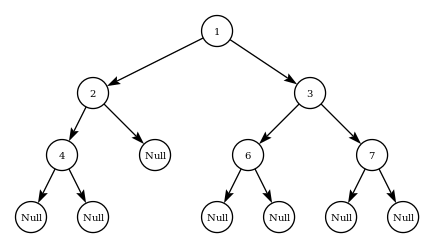

In [14]:
tree1 = Node 1 (Node 2 (Node 4 Null Null) Null) (Node 3 (Node 6 Null Null) (Node 7 Null Null))

drawTree tree1

In [15]:
plusTree :: Tree -> Tree -> Tree
-- 여기에 plusTree 정의하기

<interactive>:1:1: error: The type signature for ‘plusTree’ lacks an accompanying binding

In [16]:
mirrorTree :: Tree -> Tree
-- 여기에 mirrorTree 정의하기

<interactive>:1:1: error: The type signature for ‘mirrorTree’ lacks an accompanying binding